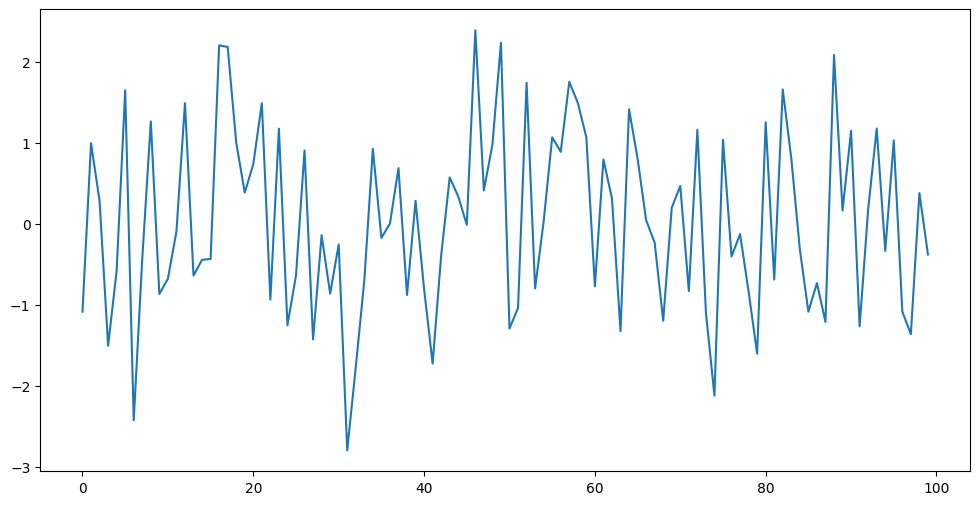

In [1]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(123)
y = np.random.normal(size=100)
plt.figure(figsize=(12, 6))
plt.plot(y)
plt.show()


In [6]:
import pandas_datareader.data as web
# Import Fama-French benchmark portfolios
ff3 = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start='2000-01-01')[0]
# Import Fama-French 25 sorted portfolios at monthly horizon
ff25 = web.DataReader('25_Portfolios_5x5', 'famafrench', start='2000-01-01')[0]
# Import Fama-French 25 sorted portfolios at daily horizon
ff25_daily = web.DataReader('25_Portfolios_5x5_Daily', 'famafrench', start='2000-01-01')[0]

In [7]:
print(ff3.head())

         Mkt-RF    SMB   HML    RF
Date                              
2000-01   -4.74   5.77 -1.88  0.41
2000-02    2.45  21.36 -9.59  0.43
2000-03    5.20 -17.20  8.13  0.47
2000-04   -6.40  -6.68  7.26  0.46
2000-05   -4.42  -6.05  4.75  0.50


In [8]:
# 导入 pandas 包
import pandas as pd

# 选择第一个投资组合作为反应变量
y = ff25.iloc[:, 0]

# 将反应变量和解释变量合并到一个 DataFrame 中
df = pd.concat([y, ff3], axis=1)

# 添加一个常数项
df['const'] = 1

# 查看数据的前五行
print(df.head())


NameError: name 'port25' is not defined

In [4]:
import statsmodels.api as sm
import pandas as pd

# 获取第一个组合的数据
ff_portfolio = ff25.iloc[:, 0]

# 获取市场、规模和价值因子的数据
ff_factors = ff3[['Mkt-RF', 'SMB', 'HML']]

# 合并数据
data = pd.concat([ff_portfolio, ff_factors], axis=1)

# 添加常数项
data = sm.add_constant(data)

# 使用同方差误差估计器估计模型
model1 = sm.OLS(data.iloc[:, 0], data.iloc[:, 1:]).fit()

# 使用 White 协方差估计器估计模型
model2 = sm.OLS(data.iloc[:, 0], data.iloc[:, 1:]).fit(cov_type='HC3')

AttributeError: 'dict' object has no attribute 'iloc'

In [9]:
# -*- coding: utf-8 -*-
"""
Created on Tue Aug 31 15:11:15 2021

@author: Teo Bee Guan
"""

import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import getFamaFrenchFactors as gff

ticker = 'msft'
start = '2016-8-31'
end = '2021-8-31'

stock_data = yf.download(ticker, start, end, adjusted=True)

ff3_monthly = gff.famaFrench3Factor(frequency='m')
ff3_monthly.rename(columns={"date_ff_factors": 'Date'}, inplace=True)
ff3_monthly.set_index('Date', inplace=True)

stock_returns = stock_data['Adj Close'].resample('M').last().pct_change().dropna()
stock_returns.name = "Month_Rtn"
ff_data = ff3_monthly.merge(stock_returns,on='Date')

X = ff_data[['Mkt-RF', 'SMB', 'HML']]
y = ff_data['Month_Rtn'] - ff_data['RF']
X = sm.add_constant(X)
ff_model = sm.OLS(y, X).fit()
print(ff_model.summary())
intercept, b1, b2, b3 = ff_model.params

rf = ff_data['RF'].mean()
market_premium = ff3_monthly['Mkt-RF'].mean()
size_premium = ff3_monthly['SMB'].mean()
value_premium = ff3_monthly['HML'].mean()

expected_monthly_return = rf + b1 * market_premium + b2 * size_premium + b3 * value_premium 
expected_yearly_return = expected_monthly_return * 12
print("Expected yearly return: " + str(expected_yearly_return))

ModuleNotFoundError: No module named 'yfinance'